In [68]:
import json
import pickle
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor


In [69]:
# Feature Engineering
df = pd.read_csv('/home/akeemlag/Downloads/processes2.csv')
df.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399


In [70]:
df.columns

Index(['Unnamed: 0', 'name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'seats', 'max_power (in bph)',
       'Mileage Unit', 'Mileage', 'Engine (CC)'],
      dtype='object')

In [71]:
# Dropping mileafe because it does not reflect the true value in comparison with the km_drivem
cols_to_drop = ['Unnamed: 0', 'max_power (in bph)', 'seats', 'Mileage Unit', 'seller_type', 'Engine (CC)', 'Mileage']
df1 = df.drop(cols_to_drop, axis='columns')

In [72]:
df1.head()

,name,year,selling_price,km_driven,fuel,transmission,owner
0,Maruti,2014,450000,145500,Diesel,Manual,First Owner
1,Hyundai,2010,225000,127000,Diesel,Manual,First Owner
2,Hyundai,2017,440000,45000,Petrol,Manual,First Owner
3,Toyota,2011,350000,90000,Diesel,Manual,First Owner
4,Ford,2013,200000,169000,Diesel,Manual,First Owner


In [73]:
# Check if there are null cols
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           2095 non-null   object
 1   year           2095 non-null   int64 
 2   selling_price  2095 non-null   int64 
 3   km_driven      2095 non-null   int64 
 4   fuel           2095 non-null   object
 5   transmission   2095 non-null   object
 6   owner          2095 non-null   object
dtypes: int64(3), object(4)
memory usage: 114.7+ KB


In [74]:
df1.describe()

,year,selling_price,km_driven
count,2095.000000,2.095000e+03,2095.000000
mean,2014.052506,4.272799e+05,67413.593795
std,3.273451,2.326698e+05,41580.846333
min,2000.000000,4.595700e+04,1000.000000
25%,2012.000000,2.500000e+05,35000.000000
50%,2014.000000,3.900000e+05,60000.000000
75%,2017.000000,5.555000e+05,90000.000000
max,2020.000000,1.594000e+06,270000.000000


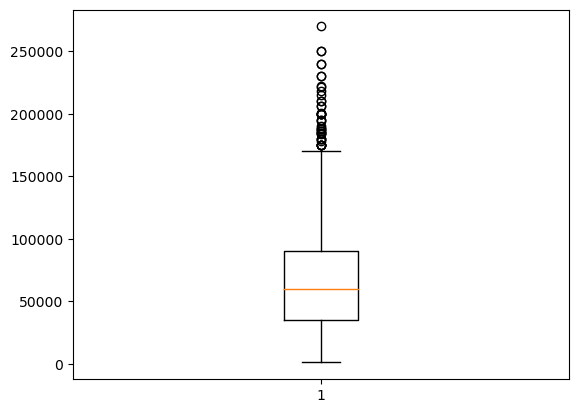

In [75]:
# Plot a boxplot to see the outliers in the km_driven
plt.boxplot(df1.km_driven);

In [76]:
df.selling_price.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2095 entries, 0 to 2094
Series name: selling_price
Non-Null Count  Dtype
--------------  -----
2095 non-null   int64
dtypes: int64(1)
memory usage: 16.5 KB


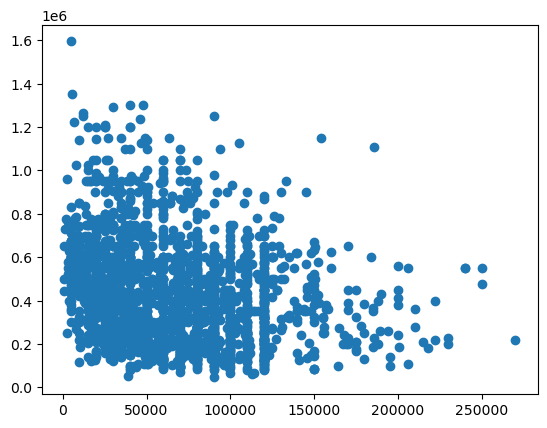

In [77]:
# plot a scatterplot to compare against price
plt.scatter(df1.km_driven, df1.selling_price);

In [78]:
# Remove outliers in the km_driven using zscore
df1['zscore'] = (df1.km_driven-df1.km_driven.mean())/df1.km_driven.std()
df1.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,zscore
0,Maruti,2014,450000,145500,Diesel,Manual,First Owner,1.877942
1,Hyundai,2010,225000,127000,Diesel,Manual,First Owner,1.433025
2,Hyundai,2017,440000,45000,Petrol,Manual,First Owner,-0.539036
3,Toyota,2011,350000,90000,Diesel,Manual,First Owner,0.543193
4,Ford,2013,200000,169000,Diesel,Manual,First Owner,2.443106


In [79]:
# Use zscore 3 to remove outliers
df2 = df1[(df1.zscore<3) & (df1.zscore>-3)]

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2071 entries, 0 to 2094
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           2071 non-null   object 
 1   year           2071 non-null   int64  
 2   selling_price  2071 non-null   int64  
 3   km_driven      2071 non-null   int64  
 4   fuel           2071 non-null   object 
 5   transmission   2071 non-null   object 
 6   owner          2071 non-null   object 
 7   zscore         2071 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 145.6+ KB


In [80]:
df2.describe()

,year,selling_price,km_driven,zscore
count,2071.000000,2.071000e+03,2071.000000,2071.000000
mean,2014.080637,4.284603e+05,65682.225978,-0.041639
std,3.267431,2.331769e+05,38501.798746,0.925950
min,2000.000000,4.595700e+04,1000.000000,-1.597216
25%,2012.000000,2.500000e+05,35000.000000,-0.779532
50%,2014.000000,3.900000e+05,60000.000000,-0.178293
75%,2017.000000,5.600000e+05,90000.000000,0.543193
max,2020.000000,1.594000e+06,190000.000000,2.948146


In [81]:
df2.head(10)

,name,year,selling_price,km_driven,fuel,transmission,owner,zscore
0,Maruti,2014,450000,145500,Diesel,Manual,First Owner,1.877942
1,Hyundai,2010,225000,127000,Diesel,Manual,First Owner,1.433025
2,Hyundai,2017,440000,45000,Petrol,Manual,First Owner,-0.539036
3,Toyota,2011,350000,90000,Diesel,Manual,First Owner,0.543193
4,Ford,2013,200000,169000,Diesel,Manual,First Owner,2.443106
5,Hyundai,2012,500000,53000,Diesel,Manual,Second Owner,-0.346640
6,Maruti,2002,150000,80000,Petrol,Manual,Second Owner,0.302697
7,Hyundai,2016,680000,100000,Diesel,Manual,First Owner,0.783688
8,Mahindra,2011,174000,100000,Diesel,Manual,Second Owner,0.783688
9,Maruti,2012,600000,72000,Diesel,Manual,First Owner,0.110301


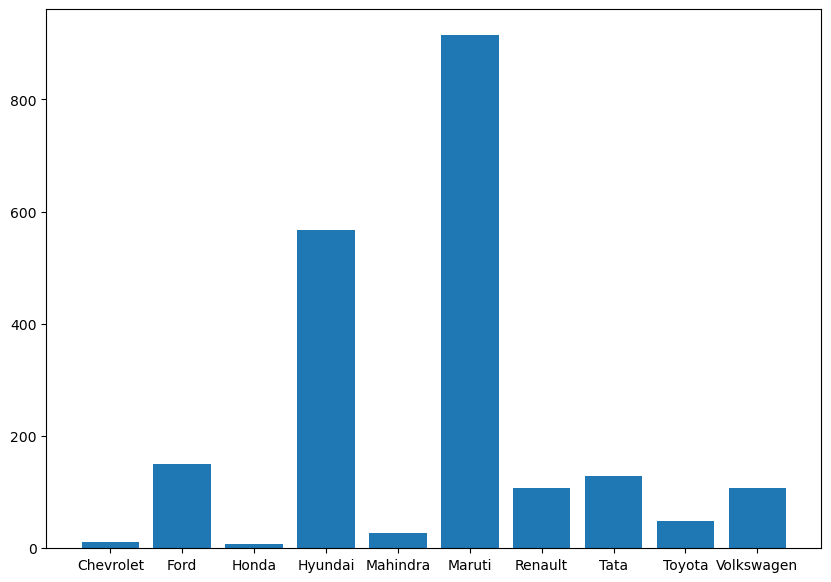

In [82]:
# Show occurences of each car name in the ds
x = df2.groupby('name')['name'].count().index
height = df2.groupby('name')['name'].count().values

plt.figure(figsize=(10,7))
plt.bar(x, height=height);

In [83]:
# get dummies for name
# Do label encoding for transimission
# Create another column for age from the year col, then remove the year col

In [84]:
# Create an age column
df2['age'] = df2.year.apply(lambda x: datetime.now().year - x)

/tmp/ipykernel_6350/759065589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age'] = df2.year.apply(lambda x: datetime.now().year - x)


In [85]:
df2.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,zscore,age
0,Maruti,2014,450000,145500,Diesel,Manual,First Owner,1.877942,10
1,Hyundai,2010,225000,127000,Diesel,Manual,First Owner,1.433025,14
2,Hyundai,2017,440000,45000,Petrol,Manual,First Owner,-0.539036,7
3,Toyota,2011,350000,90000,Diesel,Manual,First Owner,0.543193,13
4,Ford,2013,200000,169000,Diesel,Manual,First Owner,2.443106,11


In [86]:
# Drop year col and zscore col
cols_to_drop = ['year', 'zscore']
df3 = df2.drop(cols_to_drop, axis=1)
df3.head()

,name,selling_price,km_driven,fuel,transmission,owner,age
0,Maruti,450000,145500,Diesel,Manual,First Owner,10
1,Hyundai,225000,127000,Diesel,Manual,First Owner,14
2,Hyundai,440000,45000,Petrol,Manual,First Owner,7
3,Toyota,350000,90000,Diesel,Manual,First Owner,13
4,Ford,200000,169000,Diesel,Manual,First Owner,11


In [87]:
# Use LabelEncoder for fuel and transmission
# Create an instance of LabelEncoder()
le = LabelEncoder()

In [88]:
df3.fuel = le.fit_transform(df3.fuel)
df3.transmission = le.fit_transform(df3.transmission)

In [90]:
df3.head(10)

,name,selling_price,km_driven,fuel,transmission,owner,age
0,Maruti,450000,145500,1,1,First Owner,10
1,Hyundai,225000,127000,1,1,First Owner,14
2,Hyundai,440000,45000,3,1,First Owner,7
3,Toyota,350000,90000,1,1,First Owner,13
4,Ford,200000,169000,1,1,First Owner,11
5,Hyundai,500000,53000,1,1,Second Owner,12
6,Maruti,150000,80000,3,1,Second Owner,22
7,Hyundai,680000,100000,1,1,First Owner,8
8,Mahindra,174000,100000,1,1,Second Owner,13
9,Maruti,600000,72000,1,1,First Owner,12


In [91]:
df3.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [95]:
# Show of a plot of occurences
df3.plot()

TypeError: unhashable type: 'Series'